In cell below I import libraries used for analysis

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## **Data Source**

- Loaded cleaned data as csv to use for eda from **Mohammed(branch)**.

- Dataset used **(zippedData/cleaned_dataset_box_office.csv)**, **(zippedData/cleaned_dataset_film_df.csv)** & **(zippedData/cleaned_dataset_movie_budget.csv)**



In cell below I load all dataset and organize them ready to use using following variables.

- **box_office_df** - (zippedData/cleaned_dataset_box_office.csv)

- **film_df** - (zippedData/cleaned_dataset_film_df.csv)

- **movie_budget_df** - (zippedData/cleaned_dataset_movie_budget.csv)

### **In cell Below I load Data needed for analysis**

In [2]:
# load 
film_df = pd.read_csv('zippedData/cleaned_dataset_film_df2.csv')
film_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,sunghursh,sunghursh,2013,175.0,"action,crime,drama",7.0,77
1,tt0066787,one day before the rainy season,ashad ka ek din,2019,114.0,"biography,drama",7.2,43
2,tt0069049,the other side of the wind,the other side of the wind,2018,122.0,drama,6.9,4517
3,tt0069204,sabse bada sukh,sabse bada sukh,2018,91.0,"comedy,drama",6.1,13
4,tt0100275,the wandering soap opera,la telenovela errante,2017,80.0,"comedy,drama,fantasy",6.5,119


In [3]:
# check shape

film_df.shape

(73856, 8)

In [18]:
df_combined = pd.read_csv('zippedData/cleaned_dataset_film_df1.csv')
df_combined.head()

C:\Users\ronny somi\AppData\Local\Temp\ipykernel_19016\3319648674.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_combined = pd.read_csv('zippedData/cleaned_dataset_film_df1.csv')


,movie_id,ordering,person_id,category,ordering.1,title,region,is_original_title,primary_title,original_title_x,...,Unnamed: 0,genre_ids,id_y,original_language,original_title_y,popularity,release_date_y,vote_average,vote_count,profits
0,tt0475290,10,nm0005683,cinematographer,24,"Hail, Caesar!",GB,0.0,"Hail, Caesar!","Hail, Caesar!",...,17497,"[35, 18, 9648]",270487,en,"Hail, Caesar!",12.312,2016-02-05,5.9,2328,42160680.0
1,tt0475290,1,nm0000982,actor,24,"Hail, Caesar!",GB,0.0,"Hail, Caesar!","Hail, Caesar!",...,17497,"[35, 18, 9648]",270487,en,"Hail, Caesar!",12.312,2016-02-05,5.9,2328,42160680.0
2,tt0475290,2,nm0000123,actor,24,"Hail, Caesar!",GB,0.0,"Hail, Caesar!","Hail, Caesar!",...,17497,"[35, 18, 9648]",270487,en,"Hail, Caesar!",12.312,2016-02-05,5.9,2328,42160680.0
3,tt0475290,3,nm2403277,actor,24,"Hail, Caesar!",GB,0.0,"Hail, Caesar!","Hail, Caesar!",...,17497,"[35, 18, 9648]",270487,en,"Hail, Caesar!",12.312,2016-02-05,5.9,2328,42160680.0
4,tt0475290,4,nm0000146,actor,24,"Hail, Caesar!",GB,0.0,"Hail, Caesar!","Hail, Caesar!",...,17497,"[35, 18, 9648]",270487,en,"Hail, Caesar!",12.312,2016-02-05,5.9,2328,42160680.0


Cell above shows that `film_df` contains *73856* entries and *8* attributes

In cell below I load `box_office_df` and check for it shape

In [5]:
# load data from bom.movie_gross.csv.gz
# box_office_df : shows how movies were earning

box_office_df= pd.read_csv('zippedData/bom.movie_gross.csv.gz')
box_office_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [6]:
# check box_office_df shape
box_office_df.shape

(3387, 5)

**box_office_df** contains *3387* entries and *5* attributes.

In cell below I load **movie_budget_df** and check for it shape

In [7]:
# load data from tn.movie_budgets.csv.gz
movie_budget_df = pd.read_csv('zippedData/cleaned_dataset_movie_budget.csv')
movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"dec 18, 2009",avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"may 20, 2011",pirates of the caribbean: on stranger tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"jun 7, 2019",dark phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"may 1, 2015",avengers: age of ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"dec 15, 2017",star wars ep. viii: the last jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [8]:
# check for shape

movie_budget_df.shape


(5782, 6)

## **📊 Exploratory Data Analysis**

- Before beginning detailed modeling and recommendations, I will conduct an **Exploratory Data Analysis (EDA)** phase. This phase aims to uncover hidden patterns, trends, and insights that align with the project objectives.

- Based on the objectives, I have crafted the following key **analysis questions** to guide an effective exploration and ensure we achieve the project goal

✨ **General Patterns and Trends (Objective 1)**

- What are the most common genres produced over time?
- How has the average box office revenue changed by year or decade?
- Are newer movies generally earning more revenue than older ones?
- What is the distribution of movie runtimes?
- What is the distribution of movie ratings (viewer scores)?
- How does the number of votes correlate with the box office revenue?


🎥 **Highest Grossing Films (Objective 2)**

- Which films have grossed the highest revenue domestically and internationally?
- What genres do the top 10 highest-grossing films belong to?
- What is the average budget of the highest-grossing films compared to others?
- Are there specific years or decades that produced more high-grossing films?

🧩 **Key Factors Influencing Revenue (Objective 3)**

- How does **genre** influence box office revenue?
- How does **runtime** correlate with box office success (is there an optimal movie length)?
- How does **budget** size impact box office revenue?
- Does a higher audience rating lead to higher box office earnings?




In [16]:
# create a copy from film_df

film_copy = film_df.copy()
box_office_copy1 = box_office_df.copy()

In cell below I group data by `year` and `genre` then counts how many movies belong to each genre `each year`. Then finds `top5 most frequent genres` and filter data to keep only top 5 genres. Avoided ploting all genres which would make plot hard to read.

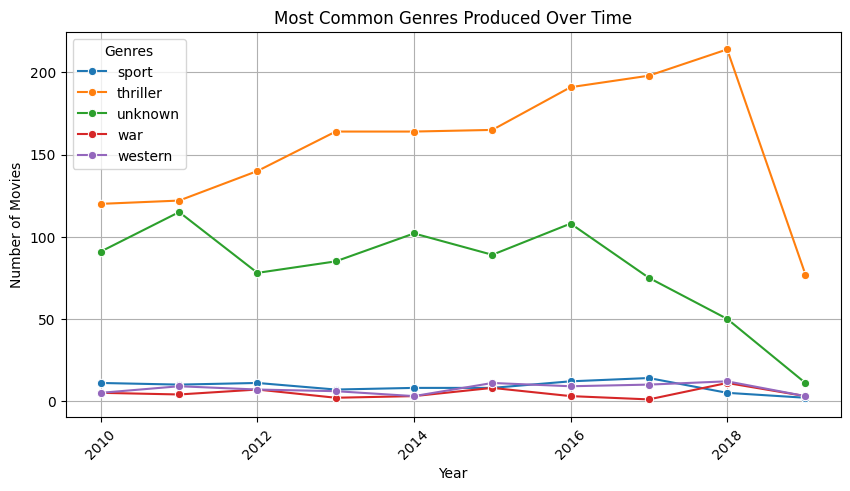

In [10]:

# Group and count
genre_year_counts = film_copy.groupby(['start_year', 'genres']).size().reset_index(name='count')

# Pick top 5 genres
top_genres = genre_year_counts['genres'].value_counts().head(5).index
genre_year_counts = genre_year_counts[genre_year_counts['genres'].isin(top_genres)]

# Line Plot

fig, ax= plt.subplots(figsize=(10,5))
sns.lineplot(data=genre_year_counts, x='start_year', y='count', hue='genres', marker='o')
ax.set_title('Most Common Genres Produced Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Movies')
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Genres')
plt.grid(True)
plt.show()


### ✅ **Insights**

1. **Thriller** was the most produced genre, peaking in 2018 before dropping sharply in 2019.
2. **Sci-Fi, Thriller** had a major spike in 2016 but didn’t sustain it.
3. **Sport**, **War**, and Western genres stayed low and stable over the years.
4. A slight rise in Western movies was seen in 2012 and 2018 but wasn't maintained.

### 🎯 **Recommendations**

1. **Focus on Thriller** Since Thriller has consistently high production, it remains a strong genre to invest in.

2. **Niche Opportunities** Explore ways to grow interest in less popular genres like Sport and Western through innovation or targeted marketing.

4. **Market Monitoring**  Track shifting audience interests, especially after the 2019 drop, to adjust production strategies.



The Cell below shows **How has the average box office revenue changed by year**. To achieve this I first converted `foreign_gross` to numeric using `pd.to_numeric()`, then **calculate total revenue** and group by year and plot a `lineplot`


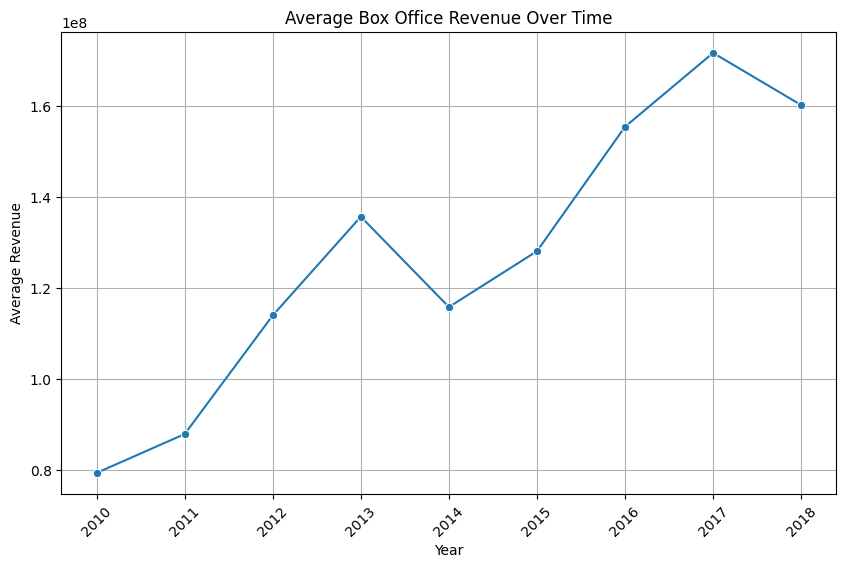

In [ ]:
# Convert column to numeric
box_office_copy1['foreign_gross'] = pd.to_numeric(box_office_copy1['foreign_gross'], errors='coerce')


#  Create a new total revenue column
box_office_copy1['total_revenue'] = box_office_copy1['domestic_gross'] + box_office_copy1['foreign_gross']

# : Group by year and calculate the mean of total_revenue
revenue_avg = box_office_copy1.groupby('year')['total_revenue'].mean().reset_index()

# : Plot lineplot
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=revenue_avg, x='year', y='total_revenue', marker='o')
ax.set_title('Average Box Office Revenue Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Average Revenue')
ax.tick_params(axis='x' ,rotation=45)
plt.grid(True)
plt.show()



##  ✅ **Insights**

- The **average box office revenue** showed a general **upward trend** from 2010 to 2017.

- The **highest average revenue** was recorded in **2017**.

- There were **two notable drops** in revenue in 2014 and again slightly in 2018.

- Despite occasional declines, the overall pattern indicates **growth in box office earnings** over the years.


### 🎯 **Recommendations**

- **Capitalize on Growth**: Focus on maintaining and boosting box office momentum by investing in high-performing genres and marketing.

- **Investigate Revenue Drops**: Analyze what factors led to the revenue declines in 2014 and 2018 to avoid similar issues in future productions.

- **Leverage Peak Years**: Study successful movies from 2017 to replicate winning strategies (e.g., genre, marketing tactics, release timing).

- **Diversify Offerings**: Ensure a mix of movies to appeal to a broad audience, helping stabilize revenue even if certain trends change.



In cell below the analysis shows **Top 10 Movies by Domestic Gross Revenue** using `barplot`

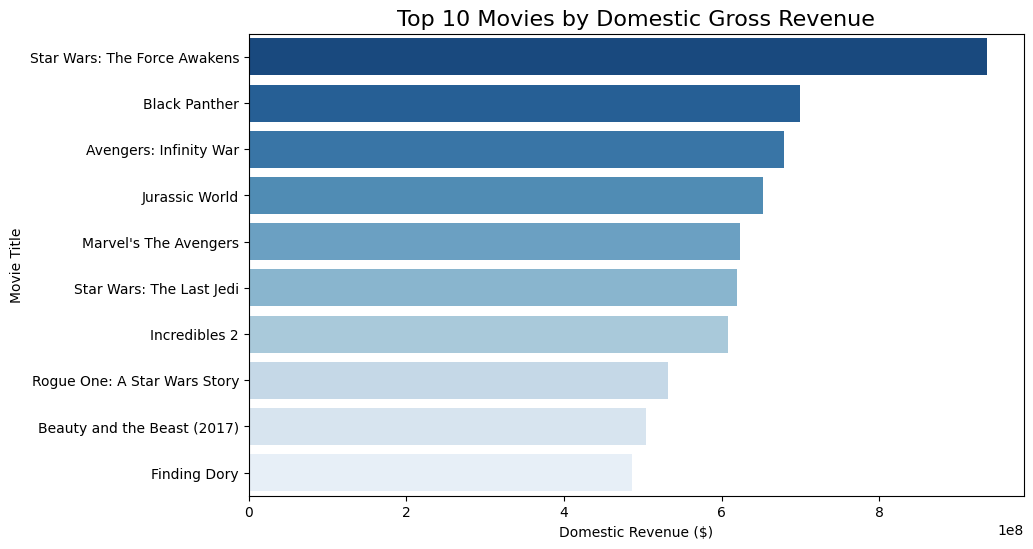

In [12]:

# Sort to find top 10 highest grossing films domestically
top_domestic = box_office_copy.sort_values(by='domestic_gross', ascending=False).head(10)

# Plot 1: Top 10 Domestic Grossing Movies
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=top_domestic, x='domestic_gross', y='title', hue='title', palette='Blues_r')
ax.set_title('Top 10 Movies by Domestic Gross Revenue', fontsize=16)
ax.set_xlabel('Domestic Revenue ($)')
ax.set_ylabel('Movie Title')

plt.show()

### ✅ **Insights**

- **Blockbusters Dominate**: All top movies are major franchise or branded titles (e.g., Marvel, Star Wars, Pixar, Disney).

- **Marvel and Disney Lead**: Marvel and Disney titles appear most frequently, showing strong market influence.

- **Top Earner**: Black Panther leads in domestic gross revenue, reflecting audience preference for superhero movies with cultural resonance.

- **Animated Films Succeed**: Films like Incredibles 2 and Finding Dory show that animated family movies also generate high revenue.

- **Consistency in Themes: Action**, adventure, and fantasy/sci-fi are dominant genres among the top 10.


### 🎯 **Recommendations**

- 🎬 **To invest in Franchises**: Focus future productions and marketing efforts on franchise films and cinematic universes.

- 📈 **To leverage Proven Genres**: Prioritize superhero, fantasy, and animated genres that consistently perform well.

- 🌍 **To promote Diversity**: The success of Black Panther highlights the importance of diverse representation and strong cultural storytelling.

- 👪 **To target Family Audiences**: Continue to develop high-quality animated and family-friendly content to tap into a broad demographic.

- 📣 **Strategic Marketing**: Follow the example of top-grossing films with early buzz, strong brand identity, and wide release strategies.

In cell below the analysis shows **Top 10 Movies by International Gross Revenue**

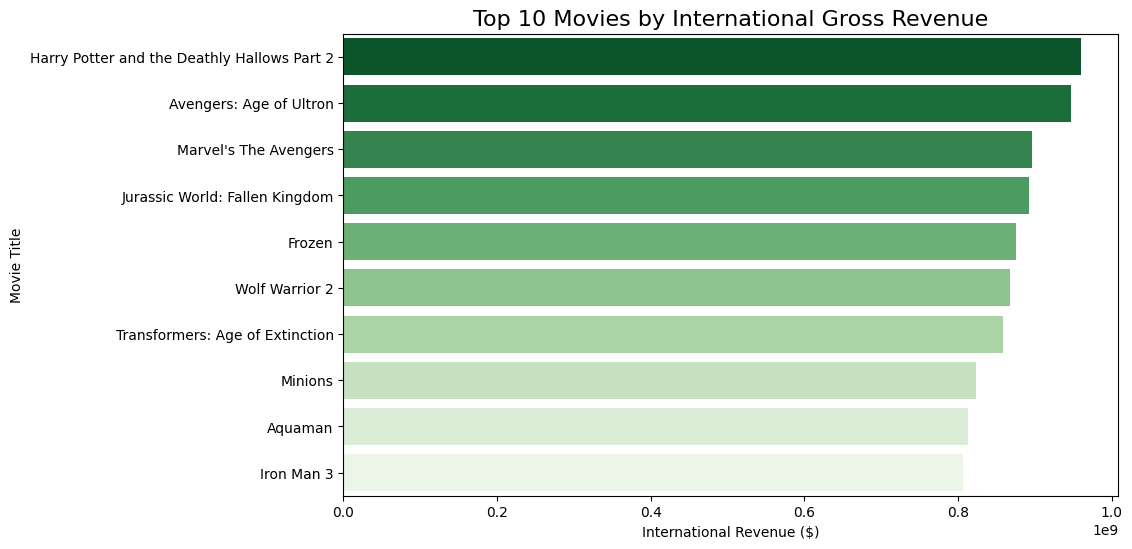

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


#  Sort to find top 10 highest grossing films internationally
top_foreign = box_office_copy1.sort_values(by='foreign_gross', ascending=False).head(10)


#  Top 10 Foreign Grossing Movies
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=top_foreign, x='foreign_gross', y='title',hue='title', palette='Greens_r')
ax.set_title('Top 10 Movies by International Gross Revenue', fontsize=16)
ax.set_xlabel('International Revenue ($)')
ax.set_ylabel('Movie Title')
plt.show()

### ✅ **Insights**


- 🌍 **Global Appeal Wins**: All top movies are high-budget blockbusters with global recognition and established fan bases.

- 🧙‍♂️ **Harry Potter Tops Internationally**: Harry Potter and the Deathly Hallows Part 2 leads, indicating the strong global loyalty to long-running franchises.

- 💥 **Superheroes Dominate**: Multiple Marvel titles (Avengers, Age of Ultron, Iron Man 3) rank high, proving superhero content translates well globally.

- 🦖 **Action and Fantasy Drive Revenue**: Movies like Jurassic World, Transformers, and Aquaman show that action, fantasy, and sci-fi genres are highly favored internationally.

- ❄️ **Family-Friendly Films Thrive**: Frozen and Minions prove that animated films can be international sensations, especially among family audiences.


### 🎯 **Recommendations**

- 🌐 **Global Distribution Strategy**: Invest in broad international releases, ensuring dubbed/subtitled versions cater to regional markets.

- 📽️ **To Focus on Franchises**: Expand existing cinematic universes (e.g., Marvel, Jurassic) or develop new franchise-capable stories.

- 👨‍👩‍👧‍👦 **To Prioritize Family Content**: Continue investing in animated and family-oriented films to capture multi-generational audiences.

- 📊 **To Tailor for Regional Markets**: Consider region-specific themes, actors, or co-productions to penetrate large markets like China and India.

- 🚀 **To Emphasize Visual Spectacle**: Since visual effects-heavy films succeed globally, allocate budget to VFX and globalized storytelling.

In cell below I analyse **movie_budget** to find the **Impact of Production Budget on Worldwide Gross Revenue**

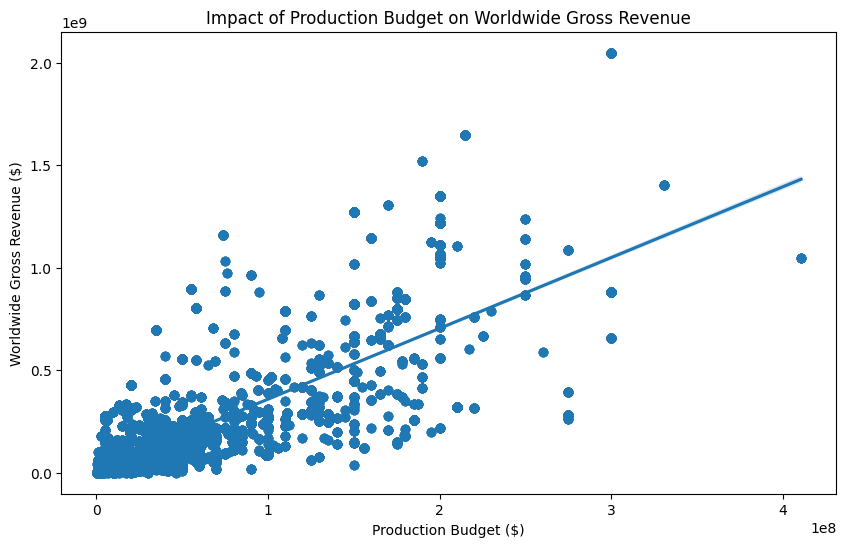

In [19]:
import pandas as pd

df_combined =df_combined
# convert the data to numeric
df_combined['production_budget'] = pd.to_numeric(df_combined['production_budget'], errors='coerce')
df_combined['worldwide_gross'] = pd.to_numeric(df_combined['worldwide_gross'], errors='coerce')

# plot regplot

fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(data=df_combined, x='production_budget', y='worldwide_gross', scatter_kws={'alpha': 0.4})
ax.set_title('Impact of Production Budget on Worldwide Gross Revenue')
ax.set_xlabel('Production Budget ($)')
ax.set_ylabel('Worldwide Gross Revenue ($)')
plt.show()

📊 **Findings**

1. **Positive Correlation** 

- There is a clear positive trend: as production budgets increase, worldwide gross revenue tends to increase too.

- The line of best fit **(regression line) confirms this upward trend, suggesting that higher investment generally yields higher returns**.

2. **Diminishing Returns Potential**

- Beyond a certain point **increases in revenue do not rise proportionally, indicating possible diminishing returns**.


✅ **Recommendations**

1. **Strategic Budgeting**

- While increasing production budget can lead to higher revenue, companies should analyze return on investment (ROI) rather than just absolute revenue.

- Consider investing moderately, especially if marketability or audience size is uncertain.

2. **Focus on Efficiency**

- Some low-to-mid budget films perform extremely well. Focus on content quality, marketing strategy, and timing.

3. **Risk Management**

- High-budget films carry higher financial risk. Consider diversifying investments across multiple mid-range budget films rather than one massive blockbuster.

In cell below the analysis shows **Average Production Budget by Genre** for all genres

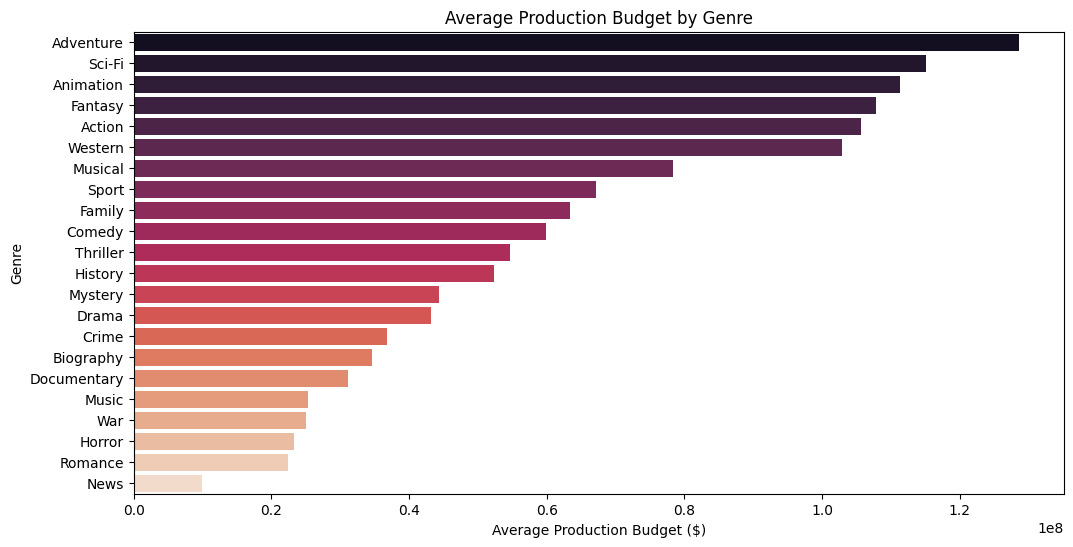

In [20]:

# Handle multiple genres per movie (split if genres are comma-separated)
df = df_combined.assign(genres=df_combined['genres'].str.split(',')).explode('genres')
df['genres'] = df['genres'].str.strip()

# Group by genre and calculate average production budget
genre_budget = df.groupby('genres')['production_budget'].mean().sort_values(ascending=False).reset_index()

# Plot
fig, ax =plt.subplots(figsize=(12, 6))
sns.barplot(data=genre_budget, x='production_budget', y='genres', hue='genres', palette='rocket')
ax.set_title('Average Production Budget by Genre')
ax.set_xlabel('Average Production Budget ($)')
ax.set_ylabel('Genre')
plt.show()


## **Production Budget Insights by Genre**

### **Highest Budget Genres**

- **Genres:** Adventure, Sci-Fi, Animation, Fantasy  
- **Average Budget:** $0.8M–$1.2M  
- 💡 These genres often involve extensive special effects, CGI, or large-scale sets.



### **Mid-Range Budget Genres**

- **Genres:** Action, Western, Musical, Sport, Family  
- **Average Budget:** $0.4M–$0.8M  
- 💡 These may require stunts, choreography, or family-friendly production values.



### 💡 **Lowest Budget Genres**

- **Genres:** Comedy, Thriller, History, Mystery, Drama, Crime, Biography, Documentary, Music, War, Horror, Romance, News  
- **Average Budget:** $0.4M  
- 💡 Typically rely on storytelling, dialogue, or real-world settings, making them cost-effective.



## **Notable Observations**

- 🎃 **Horror** and 💘 **Romance** are low-budget genres but often profitable due to strong audience demand.
- 📽️ **Documentary** and 📰 **News** have the smallest budgets, requiring minimal production design or effects.


## ✅ **Recommendations**

### **For Studios with Limited Budgets**

-  **Focus on low-cost genres** like Horror, Romance, Comedy, or Drama  
-  These require minimal investment but can yield high returns when well-executed



### 💰 **For High-Budget Productions**

-  **Invest in Adventure, Sci-Fi, or Animation**  
-  These genres attract large audiences and have strong franchise potential—but come with higher risks



### ⚖️ **Balanced Portfolio Strategy**

-  **Mix high-budget blockbusters** (e.g., Fantasy, Action)  
- **Include low-budget genres** (e.g., Thriller, Crime)  
- This diversification helps manage risk and maximize overall profitability



### 📈 **Market Trends to Leverage**

-  **Explore hybrid genres** like Sci-Fi Horror or Action-Comedy  
-  Combines high-budget appeal with cost-effective storytelling



### **Audience Targeting**
- **Match budget to audience expectations**  
- For example, Animation and Family films should deliver high production quality to meet viewer standards



## **Conclusion**

- The company should consider starting with **thriller** films, as this genre has demonstrated consistently high production volume over time, indicating steady demand.

- To attract a broad audience early on, the company may focus on genres such as *Adventure*, *Sci-Fi*, and *Fantasy*. These genres typically require higher budgets, often resulting in higher-quality productions that appeal to a wide market.

- As a strategic entry point, the company could begin with **mid-range budget** genres such as *Action* and *Sports*, then gradually scale up to higher-budget productions as revenue and experience grow.

- Expanding **global marketing efforts** is crucial, as analysis shows a strong correlation between budget and international revenue — indicating that higher investments often lead to greater returns.

- Initial investments should be moderate. Overspending early could be risky, especially given that returns may diminish beyond a certain budget threshold, leading to potential losses.

- The company should **prioritize family-friendly content**, including animated and family-oriented films, as these have consistently captured wide audience appeal and long-term value.

- It is advisable to **leverage proven genres** particularly *Superhero*, *Fantasy*, and *Animated* which have a strong track record of commercial success and audience engagement.

- A strong emphasis should be placed on **market trend monitoring**. Tracking shifting audience preferences, especially in response to events like the 2019 downturn, will enable timely adjustments to production strategies and content focus.
